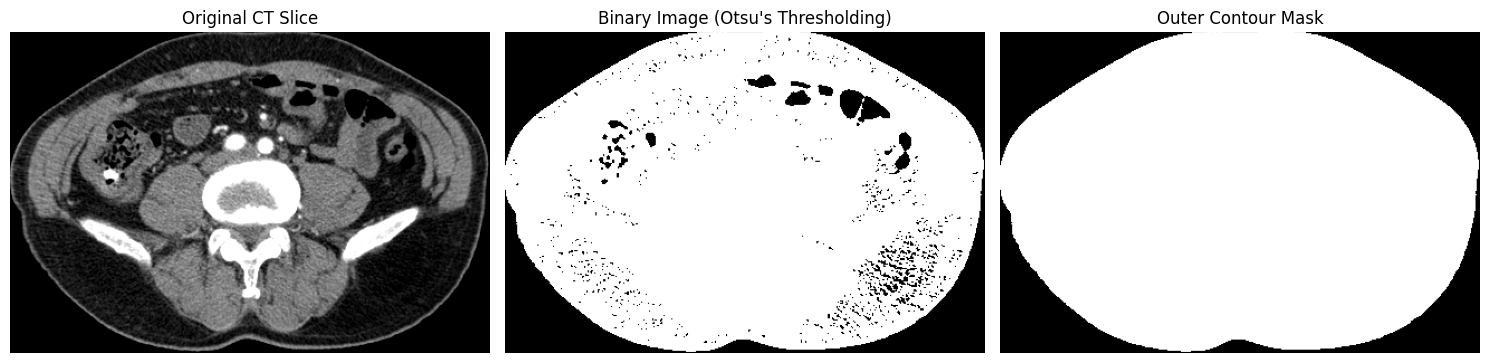

Mask saved as ct_scan_mask.png


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests

def get_outer_contour(path):
    """
    This function takes the URL of a CT scan image, finds the outer contour,
    and returns the original image, the binary image, and the final mask.
    """
    try:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        _, thresh = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            mask = np.zeros(img.shape, np.uint8)
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)
            return img, thresh, mask
        else:
            print("No contours found.")
            return None, None, None

    except requests.exceptions.RequestException as e:
        print(f"Error downloading the image: {e}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None


# Get the images
original_img, binary_img, mask_img = get_outer_contour("../data/images/D12_0.png")

if original_img is not None:
    # Display the original image, the binary image, and the final mask
    # using matplotlib for better visualization.
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original CT Slice')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image (Otsu\'s Thresholding)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(mask_img, cmap='gray')
    plt.title('Outer Contour Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Save the resulting mask as an image file.
    # The file will be saved in the same directory as the script.
    try:
        cv2.imwrite('ct_scan_mask.png', mask_img)
        print("Mask saved as ct_scan_mask.png")
    except Exception as e:
        print(f"Error saving the mask: {e}")

In [20]:
img = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
mask = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])

print(img)

img[mask == 0] = 0
print(img)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 0 0]
 [1 1 1]
 [0 0 0]]


In [18]:
mask == 1

array([[False, False, False],
       [ True,  True,  True],
       [False, False, False]])